In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import plotly.plotly as py
from plotly.graph_objs import *
from sklearn.preprocessing import scale
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model


In [3]:
%matplotlib inline

In [7]:
df =pd.read_excel('zephyr.xlsx')

In [8]:
df.head()


,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,12/03/13,0.00,83,2750000,2500000,90.909091,1,0,8
1,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,06/16/15,400.00,0,799000,850000,106.382979,0,1,8
2,134 Alhambra St,Marina,3,3.0,1,0,NaN,01/19/16,0.00,56,3195000,3075000,96.244131,1,0,7
3,1340 Clay St #802,Nob Hill,3,3.0,2,0,NaN,09/29/15,2990.63,4,2495000,3000000,120.240481,0,1,8
4,1342 Green St #4,Russian Hill,1,1.0,1,0,NaN,06/03/14,200.00,31,739000,750000,101.488498,0,1,8


In [9]:
df.count()


address               4342
district              4342
bedroom               4342
bath                  4342
parking               4342
sqft                  4342
dollar_sqft           3792
sold                  4342
home_own_ass          4342
day_on_market         4342
list_price            4342
sale_price            4342
sale_to_list_ratio    4342
single_f_h            4342
condo                 4342
dist_no               4342
dtype: int64

In [10]:
df.describe()


,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
count,4342.000000,4342.000000,4342.000000,4342.000000,3792.000000,4342.000000,4342.000000,4.342000e+03,4.342000e+03,4342.000000,4342.000000,4342.000000,4342.000000
mean,2.337402,1.891237,1.231690,1290.814371,894.296805,398.018699,37.094657,2.558661e+06,1.474873e+06,129.296073,0.421004,0.578996,8.492400
std,1.203801,1.015538,0.710749,1074.240761,384.506953,740.193016,42.660902,2.790305e+07,1.665789e+06,1516.038849,0.493777,0.493777,1.245979
min,0.000000,1.000000,0.000000,0.000000,125.000000,0.000000,0.000000,3.000000e+03,1.399000e+05,0.097774,0.000000,0.000000,7.000000
25%,2.000000,1.000000,1.000000,764.000000,600.000000,0.000000,13.000000,6.488500e+05,6.900000e+05,100.000000,0.000000,0.000000,7.000000
50%,2.000000,2.000000,1.000000,1150.000000,858.211880,278.325000,25.000000,8.490000e+05,9.010000e+05,104.825667,0.000000,1.000000,8.000000
75%,3.000000,2.000000,2.000000,1613.000000,1108.550427,584.460000,47.000000,1.475000e+06,1.500000e+06,113.458013,1.000000,1.000000,10.000000
max,14.000000,11.000000,7.000000,20516.000000,4228.571429,31356.770000,609.000000,7.950000e+08,3.100000e+07,100000.000000,1.000000,1.000000,10.000000


In [11]:
df.columns


Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')

In [12]:
print df.columns

Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')


In [14]:
type(df.sold[0])

unicode

In [16]:
type(df.parking[0])

numpy.int64

In [31]:
sold_dt = pd.to_datetime(df.sold, infer_datetime_format=True)

In [32]:
sold_dt.head()


0   2013-12-03
1   2015-06-16
2   2016-01-19
3   2015-09-29
4   2014-06-03
Name: sold, dtype: datetime64[ns]

In [33]:
type(sold_dt[0])

pandas.tslib.Timestamp

In [35]:
sold_dt[0]


Timestamp('2013-12-03 00:00:00')

In [38]:
sold_dt[0].year


2013

In [44]:
sold_dt.count()

4342

In [45]:
df.sold = sold_dt

In [46]:
df.head()

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.00,83,2750000,2500000,90.909091,1,0,8
1,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,2015-06-16,400.00,0,799000,850000,106.382979,0,1,8
2,134 Alhambra St,Marina,3,3.0,1,0,NaN,2016-01-19,0.00,56,3195000,3075000,96.244131,1,0,7
3,1340 Clay St #802,Nob Hill,3,3.0,2,0,NaN,2015-09-29,2990.63,4,2495000,3000000,120.240481,0,1,8
4,1342 Green St #4,Russian Hill,1,1.0,1,0,NaN,2014-06-03,200.00,31,739000,750000,101.488498,0,1,8


In [48]:
type(df.sold[0])

pandas.tslib.Timestamp

In [49]:
df.columns


Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')

In [50]:
model = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + sold + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)
linreg = model.fit()
print linreg.summary()

NameError: name 'smf' is not defined

In [51]:
import statsmodels.formula.api as smf

In [52]:
model = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + sold + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)

In [53]:
linreg = model.fit()
print linreg.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     13.74
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:30:21   Log-Likelihood:                -65285.
No. Observations:                4342   AIC:                         1.322e+05
Df Residuals:                    3536   BIC:                         1.373e+05
Df Model:                         805                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [54]:
model_nodate = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no', data=df)
linreg2 = model_nodate.fit()
print linreg2.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     339.6
Date:                Wed, 16 Nov 2016   Prob (F-statistic):               0.00
Time:                        22:35:28   Log-Likelihood:                -65680.
No. Observations:                4342   AIC:                         1.314e+05
Df Residuals:                    4310   BIC:                         1.316e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [55]:
df.sort_values?


In [60]:
df.sort_values('sold')

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10
1723,2055 Thomas Ave,Silver Terrace,3,2.0,1,1010,544.554455,2013-11-13,0.00,43,539000,550000,102.040816,1,0,10
518,873 Meade Ave,Bayview Heights,3,2.0,1,0,NaN,2013-11-13,150.00,41,479000,477000,99.582463,0,1,10
381,3417 Divisadero St,Marina,2,1.5,1,0,NaN,2013-11-13,0.00,85,1299888,1245075,95.783252,0,1,7
2478,2821 Buchanan St #2,Pacific Heights,2,1.0,1,1250,1064.000000,2013-11-13,256.00,25,1300000,1330000,102.307692,0,1,7
313,2921 Jackson St,Pacific Heights,5,4.0,2,0,NaN,2013-11-13,0.00,7,3695000,3850000,104.194858,1,0,7


In [117]:
df.sold[0].year

2013

In [64]:
df.sort_values('sold').sold.head()


1032   2013-11-12
958    2013-11-12
2956   2013-11-12
2255   2013-11-13
1647   2013-11-13
Name: sold, dtype: datetime64[ns]

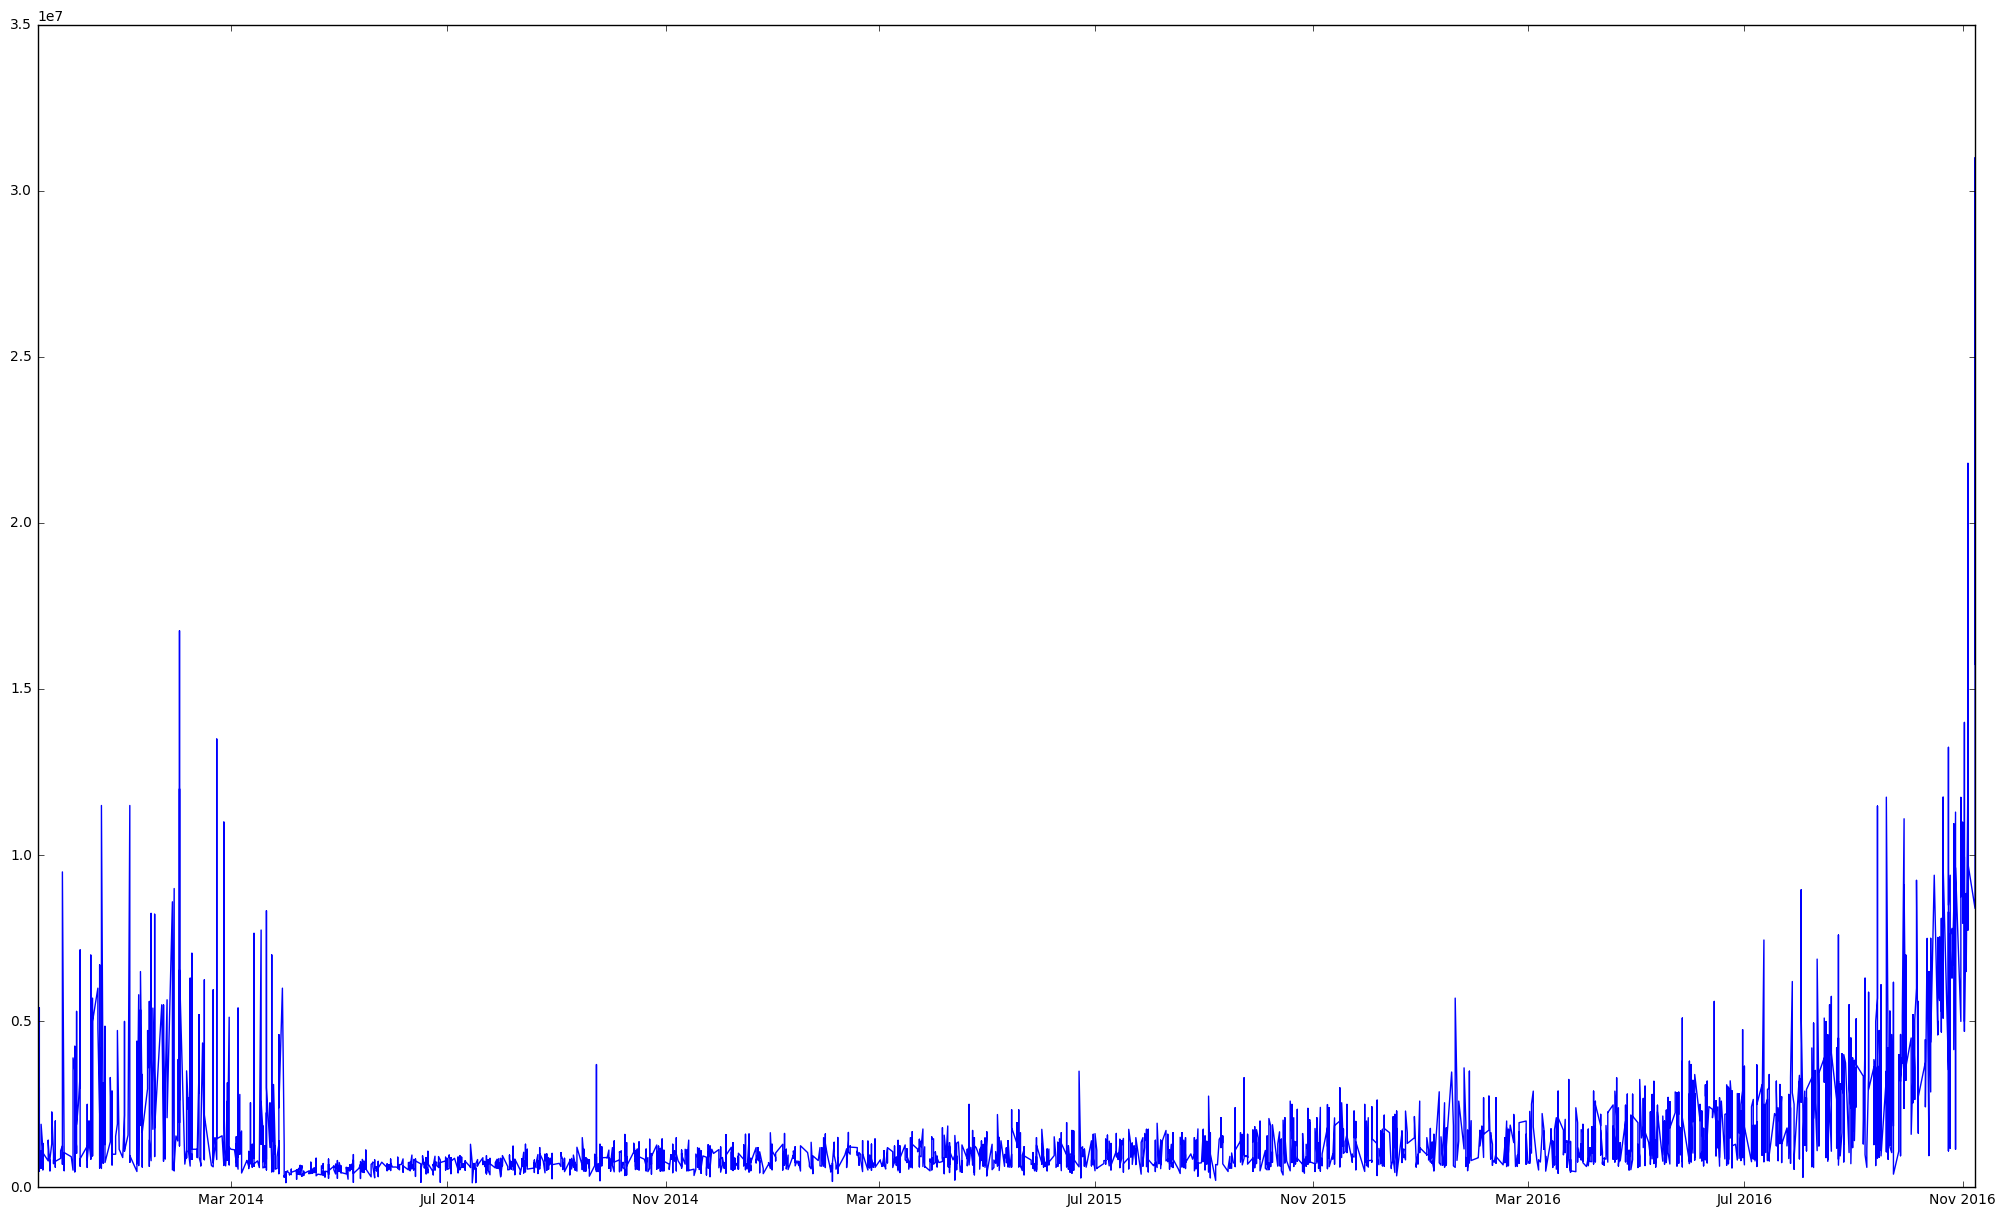

In [71]:
plt.figure(figsize=(25,15))
plt.plot(df.sort_values(['sold', 'list_price']).sold, df.sale_price)
plt.show()

In [72]:
df.sort_values('sold').head(100)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10
1723,2055 Thomas Ave,Silver Terrace,3,2.0,1,1010,544.554455,2013-11-13,0.00,43,539000,550000,102.040816,1,0,10
518,873 Meade Ave,Bayview Heights,3,2.0,1,0,NaN,2013-11-13,150.00,41,479000,477000,99.582463,0,1,10
381,3417 Divisadero St,Marina,2,1.5,1,0,NaN,2013-11-13,0.00,85,1299888,1245075,95.783252,0,1,7
2478,2821 Buchanan St #2,Pacific Heights,2,1.0,1,1250,1064.000000,2013-11-13,256.00,25,1300000,1330000,102.307692,0,1,7
313,2921 Jackson St,Pacific Heights,5,4.0,2,0,NaN,2013-11-13,0.00,7,3695000,3850000,104.194858,1,0,7


In [81]:
df.sold[0].year


2013

In [85]:
for i in range(100):
    print df.sort_values('sold.year').sold[i].year
    

KeyError: 'sold.year'

In [87]:
df.sort_values('sold').sale_price.head(20)

1032     595000
958      610000
2956    1130000
2255     510000
1647     641500
1723     550000
518      477000
381     1245075
2478    1330000
313     3850000
1526     638625
787      665000
3330    1200000
800      625000
249     1866000
297     3800000
866      460000
1447    1087000
1819     640500
1332     860000
Name: sale_price, dtype: int64

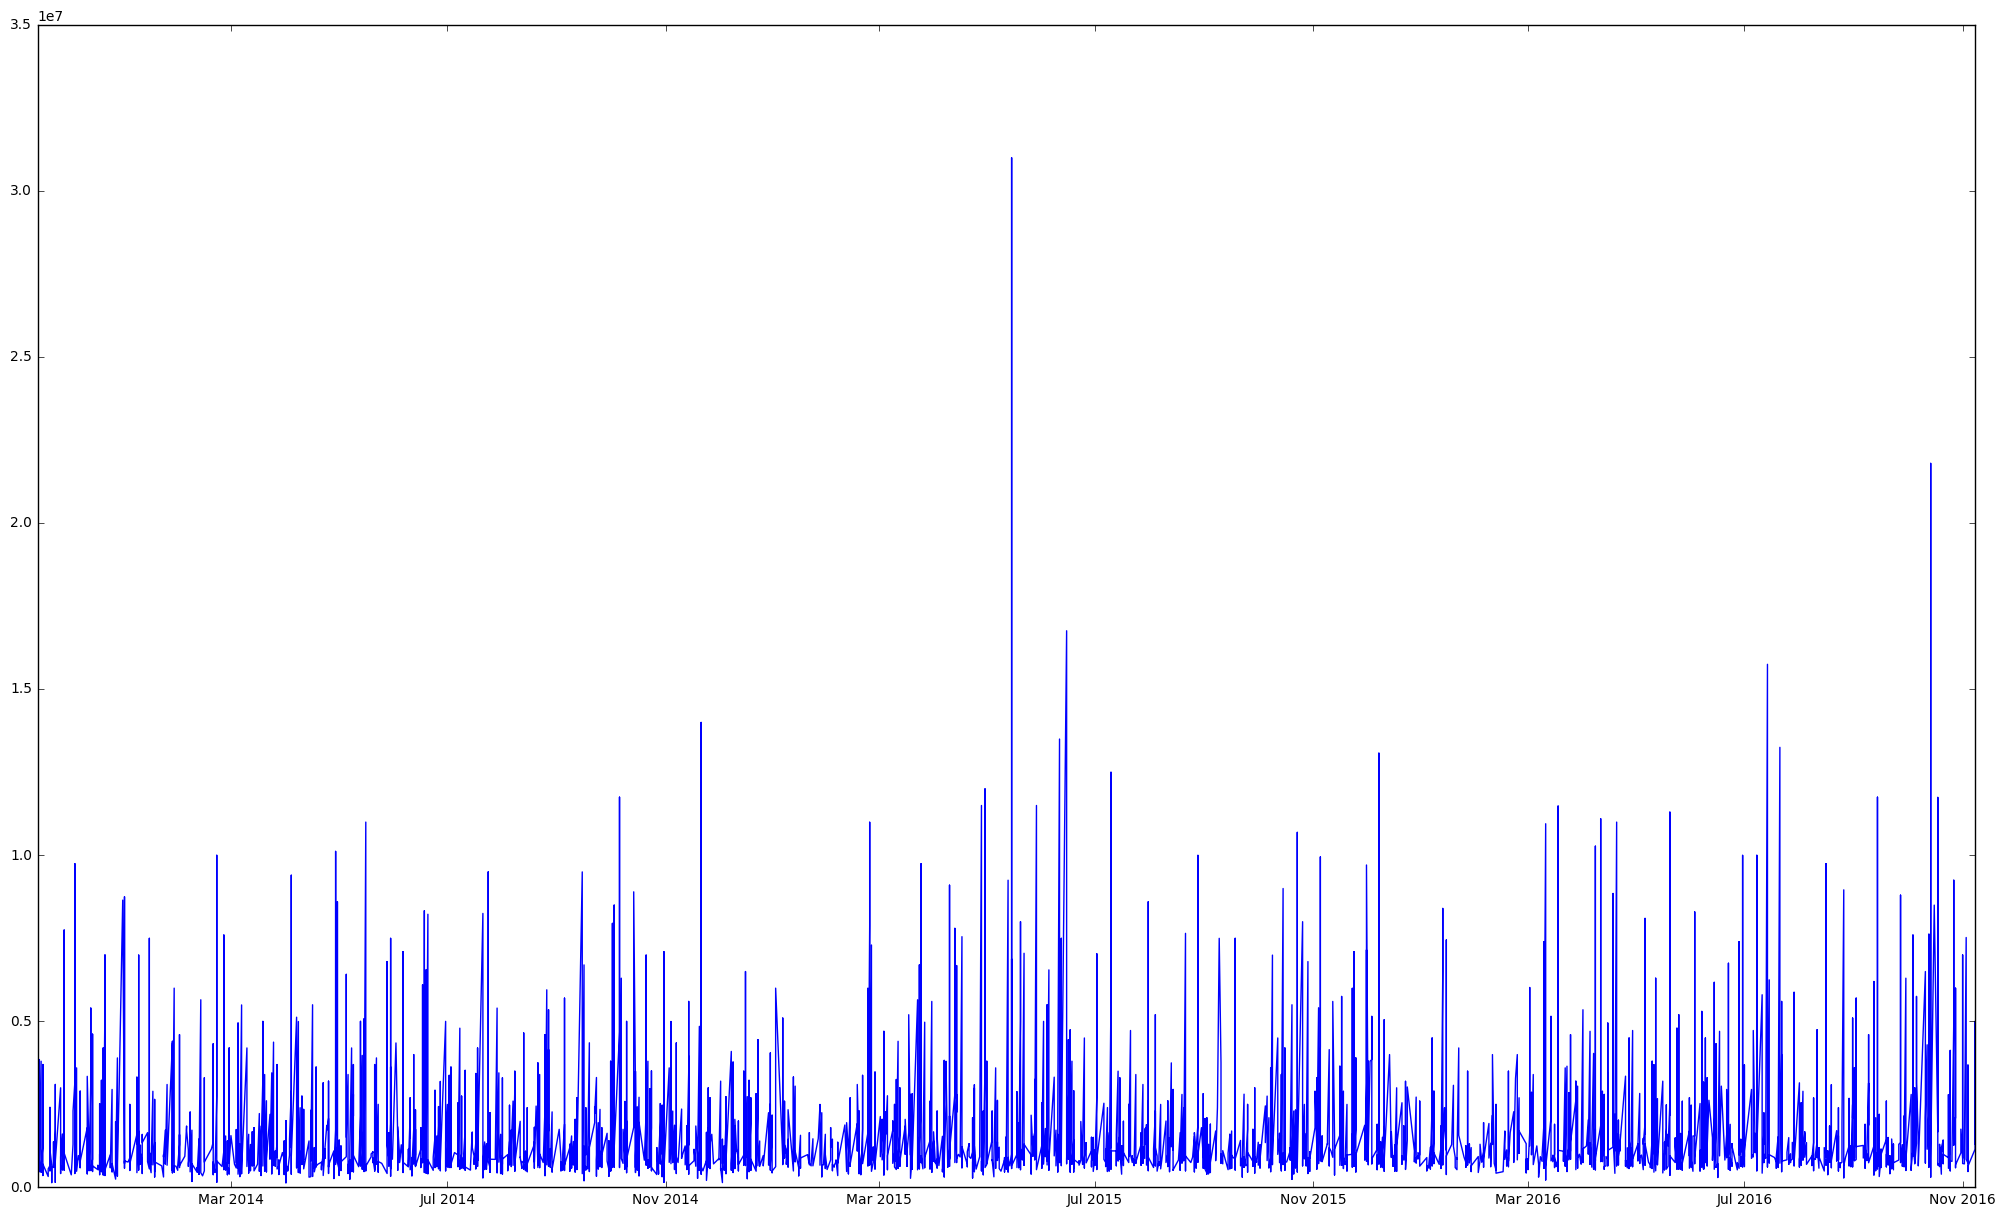

In [89]:
plt.figure(figsize=(25,15))
plt.plot(df.sort_values(['sold', 'dist_no']).sold, df.sort_values(['sold', 'dist_no']).sale_price)
plt.show()

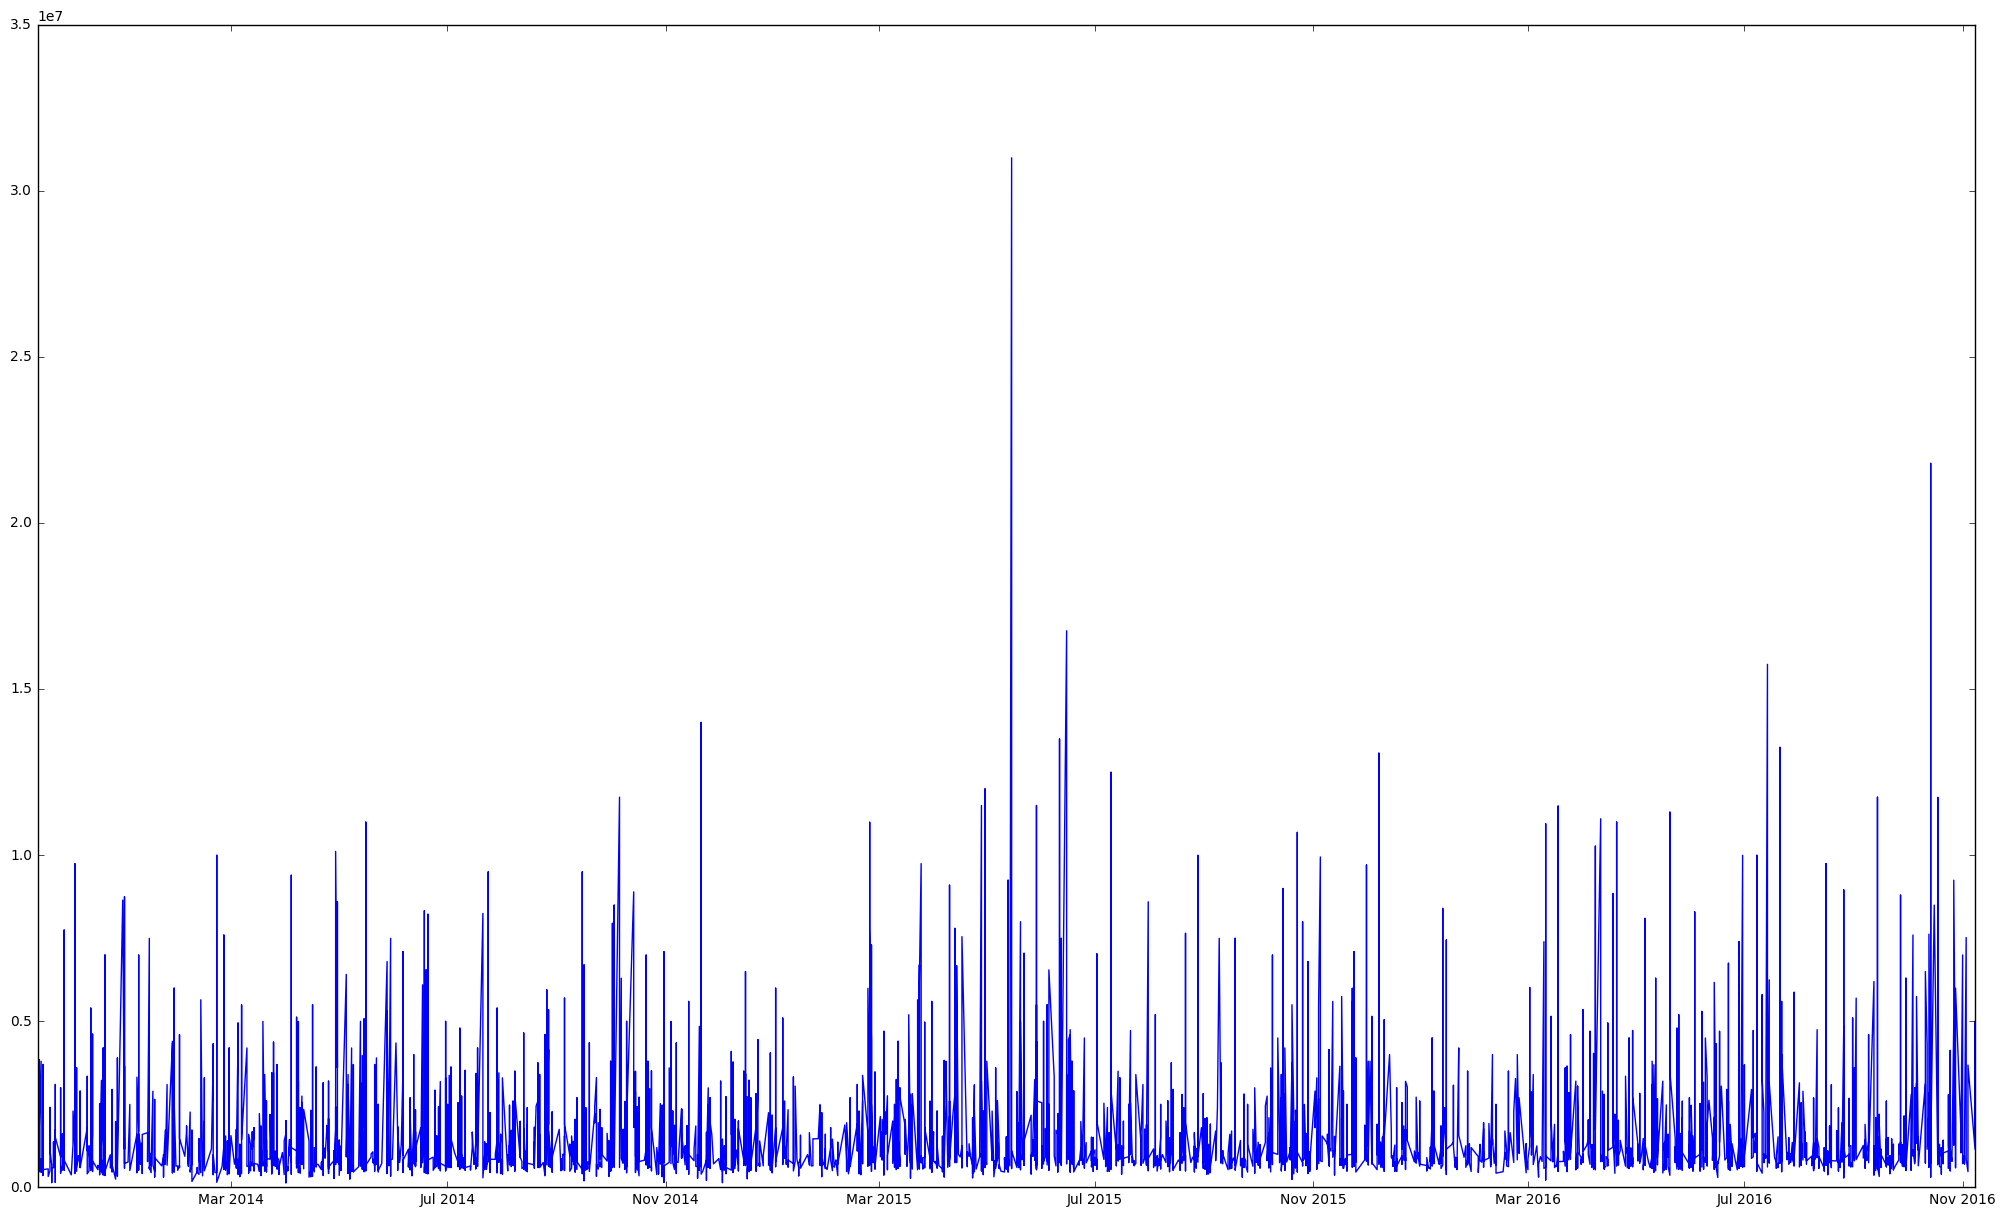

In [99]:
plt.figure(figsize=(25,15))
plt.plot(df.sort_values(['sold', 'dist_no', 'sale_price'], ascending=[True, True, False]).sold, df.sort_values(['sold']).sale_price)
plt.show()

In [102]:
df.index


RangeIndex(start=0, stop=4342, step=1)

In [105]:
df.iloc[0:5, 0]


0      1335 Jackson St
1     1335 Union St #9
2      134 Alhambra St
3    1340 Clay St #802
4     1342 Green St #4
Name: address, dtype: object

In [110]:
for i in range(4342):
    print df.sold[i].year, df.sold[i].month

2013 12
2015 6
2016 1
2015 9
2014 6
2016 8
2015 11
2013 12
2015 10
2016 6
2014 12
2015 3
2014 3
2014 11
2014 2
2013 12
2014 1
2016 6
2015 4
2015 8
2014 6
2016 7
2015 3
2014 3
2016 3
2014 9
2015 7
2015 8
2013 12
2016 7
2014 9
2015 3
2013 12
2016 7
2015 7
2015 5
2015 10
2014 7
2015 1
2015 5
2016 1
2014 11
2016 5
2015 11
2014 5
2014 11
2015 4
2016 4
2014 8
2014 10
2014 12
2014 12
2015 1
2014 12
2014 12
2016 10
2015 1
2015 3
2016 9
2015 1
2015 12
2015 4
2016 4
2016 2
2015 12
2015 6
2015 4
2016 2
2016 5
2015 4
2015 3
2016 4
2014 12
2016 3
2014 11
2014 11
2014 3
2014 6
2015 2
2014 9
2014 10
2015 2
2015 6
2015 7
2014 10
2015 10
2014 10
2014 10
2015 8
2014 6
2014 12
2015 10
2015 8
2015 7
2014 1
2013 12
2014 11
2014 5
2015 9
2014 8
2014 5
2015 11
2014 9
2014 6
2014 4
2016 1
2015 8
2016 2
2015 10
2015 12
2015 7
2014 4
2016 5
2014 12
2014 12
2016 5
2014 11
2014 7
2014 12
2013 11
2014 6
2014 1
2015 12
2015 9
2016 4
2014 5
2016 3
2015 4
2015 8
2015 11
2013 12
2015 10
2015 7
2014 6
2016 4
2016 5
201

In [119]:
len(df)

4342

In [125]:
format = lambda x: x.year
df.sold_year = df.sold.map(format)

In [126]:
df.sold.head()


0   2013-12-03
1   2015-06-16
2   2016-01-19
3   2015-09-29
4   2014-06-03
Name: sold, dtype: datetime64[ns]

In [127]:
df.head(2)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.0,83,2750000,2500000,90.909091,1,0,8
1,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,2015-06-16,400.0,0,799000,850000,106.382979,0,1,8


In [128]:
df.sold_year.head()

0    2013
1    2015
2    2016
3    2015
4    2014
Name: sold, dtype: int64

In [129]:
df.columns

Index([u'address', u'district', u'bedroom', u'bath', u'parking', u'sqft',
       u'dollar_sqft', u'sold', u'home_own_ass', u'day_on_market',
       u'list_price', u'sale_price', u'sale_to_list_ratio', u'single_f_h',
       u'condo', u'dist_no'],
      dtype='object')

In [130]:
type(df.sold_year)

pandas.core.series.Series

In [131]:
format2 = lambda x: x.month
df.sold_month = df.sold.map(format2)

In [132]:
df.sold_month.head()


0    12
1     6
2     1
3     9
4     6
Name: sold, dtype: int64

In [134]:
df['sold_year'] = pd.Series(df.sold_year, index=df.index)

In [135]:
df.head(1)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.0,83,2750000,2500000,90.909091,1,0,8,2013


In [136]:
df.sold_year.head()

0    2013
1    2015
2    2016
3    2015
4    2014
Name: sold, dtype: int64

In [137]:
df['sold_month'] = pd.Series(df.sold_month, index=df.index)

In [138]:
df.head(1)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
0,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.0,83,2750000,2500000,90.909091,1,0,8,2013,12


In [139]:
model_y_m = smf.ols(formula='sale_price ~ district + bedroom + bath + parking + sqft + home_own_ass + day_on_market + list_price + single_f_h + condo + dist_no + sold_year + sold_month', data=df)
linreg3 = model_y_m.fit()
print linreg3.summary()

                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     324.7
Date:                Thu, 17 Nov 2016   Prob (F-statistic):               0.00
Time:                        10:56:36   Log-Likelihood:                -65651.
No. Observations:                4342   AIC:                         1.314e+05
Df Residuals:                    4308   BIC:                         1.316e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------

In [140]:
df_address = df.set_index(['address'])

In [141]:
df_address.head(2)

,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
address,,,,,,,,,,,,,,,,,
1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.0,83,2750000,2500000,90.909091,1,0,8,2013,12
1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,2015-06-16,400.0,0,799000,850000,106.382979,0,1,8,2015,6


In [142]:
df_sold = df.set_index(['sold'])

In [143]:
df_sold.head(2)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2013-12-03,1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,0.0,83,2750000,2500000,90.909091,1,0,8,2013,12
2015-06-16,1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,400.0,0,799000,850000,106.382979,0,1,8,2015,6


In [146]:
df_sold.sort_index


<bound method DataFrame.sort_index of                             address                district  bedroom   bath  \
sold                                                                          
2013-12-03          1335 Jackson St              Nob Hill          4   3.50   
2015-06-16         1335 Union St #9          Russian Hill          1   1.00   
2016-01-19          134 Alhambra St                Marina          3   3.00   
2015-09-29        1340 Clay St #802              Nob Hill          3   3.00   
2014-06-03         1342 Green St #4          Russian Hill          1   1.00   
2016-08-09         1342 Green St #6          Russian Hill          1   1.00   
2015-11-04            135 Locust St      Presidio Heights          4   3.50   
2013-12-06               1350 Jones              Nob Hill          4   3.00   
2015-10-07           1354 Palou Ave               Bayview          3   3.00   
2016-06-13         136 Cambridge St               Portola          2   1.00   
2014-12-18    

In [147]:
df_sold.sort_values


<bound method DataFrame.sort_values of                             address                district  bedroom   bath  \
sold                                                                          
2013-12-03          1335 Jackson St              Nob Hill          4   3.50   
2015-06-16         1335 Union St #9          Russian Hill          1   1.00   
2016-01-19          134 Alhambra St                Marina          3   3.00   
2015-09-29        1340 Clay St #802              Nob Hill          3   3.00   
2014-06-03         1342 Green St #4          Russian Hill          1   1.00   
2016-08-09         1342 Green St #6          Russian Hill          1   1.00   
2015-11-04            135 Locust St      Presidio Heights          4   3.50   
2013-12-06               1350 Jones              Nob Hill          4   3.00   
2015-10-07           1354 Palou Ave               Bayview          3   3.00   
2016-06-13         136 Cambridge St               Portola          2   1.00   
2014-12-18   

In [149]:
df.sort_values('sold')

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8,2013,11
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8,2013,11
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8,2013,11
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8,2013,11
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10,2013,11
1723,2055 Thomas Ave,Silver Terrace,3,2.0,1,1010,544.554455,2013-11-13,0.00,43,539000,550000,102.040816,1,0,10,2013,11
518,873 Meade Ave,Bayview Heights,3,2.0,1,0,NaN,2013-11-13,150.00,41,479000,477000,99.582463,0,1,10,2013,11
381,3417 Divisadero St,Marina,2,1.5,1,0,NaN,2013-11-13,0.00,85,1299888,1245075,95.783252,0,1,7,2013,11
2478,2821 Buchanan St #2,Pacific Heights,2,1.0,1,1250,1064.000000,2013-11-13,256.00,25,1300000,1330000,102.307692,0,1,7,2013,11
313,2921 Jackson St,Pacific Heights,5,4.0,2,0,NaN,2013-11-13,0.00,7,3695000,3850000,104.194858,1,0,7,2013,11


In [152]:
df_sold = df.sort_values('sold')

In [153]:
df_sold.head()

,address,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
1032,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,2013-11-12,556.00,8,500000,595000,119.000000,0,1,8,2013,11
958,930 Pine #211,Downtown,1,1.0,1,700,871.428571,2013-11-12,511.14,35,599000,610000,101.836394,0,1,8,2013,11
2956,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,2013-11-12,565.00,38,1195000,1130000,94.560669,0,1,8,2013,11
2255,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,2013-11-13,500.00,52,448000,510000,113.839286,0,1,8,2013,11
1647,779 Sweeny St,Portola,3,1.0,1,990,647.979798,2013-11-13,0.00,31,559000,641500,114.758497,1,0,10,2013,11


In [154]:
df_sold = df_sold.set_index('sold')

In [156]:
df_sold.head()


,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2013-11-12,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,556.00,8,500000,595000,119.000000,0,1,8,2013,11
2013-11-12,930 Pine #211,Downtown,1,1.0,1,700,871.428571,511.14,35,599000,610000,101.836394,0,1,8,2013,11
2013-11-12,20 Vandewater St,North Beach,2,2.0,1,1456,776.098901,565.00,38,1195000,1130000,94.560669,0,1,8,2013,11
2013-11-13,950 Stockton St #201,Financial District/B,0,2.0,0,1185,430.379747,500.00,52,448000,510000,113.839286,0,1,8,2013,11
2013-11-13,779 Sweeny St,Portola,3,1.0,1,990,647.979798,0.00,31,559000,641500,114.758497,1,0,10,2013,11


In [157]:
df_address.head(10)

,district,bedroom,bath,parking,sqft,dollar_sqft,sold,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
address,,,,,,,,,,,,,,,,,
1335 Jackson St,Nob Hill,4,3.5,3,0,NaN,2013-12-03,0.00,83,2750000,2500000,90.909091,1,0,8,2013,12
1335 Union St #9,Russian Hill,1,1.0,1,0,NaN,2015-06-16,400.00,0,799000,850000,106.382979,0,1,8,2015,6
134 Alhambra St,Marina,3,3.0,1,0,NaN,2016-01-19,0.00,56,3195000,3075000,96.244131,1,0,7,2016,1
1340 Clay St #802,Nob Hill,3,3.0,2,0,NaN,2015-09-29,2990.63,4,2495000,3000000,120.240481,0,1,8,2015,9
1342 Green St #4,Russian Hill,1,1.0,1,0,NaN,2014-06-03,200.00,31,739000,750000,101.488498,0,1,8,2014,6
1342 Green St #6,Russian Hill,1,1.0,1,0,NaN,2016-08-09,200.00,47,899000,899000,100.000000,0,1,8,2016,8
135 Locust St,Presidio Heights,4,3.5,1,0,NaN,2015-11-04,0.00,12,4995000,5410000,108.308308,1,0,7,2015,11
1350 Jones,Nob Hill,4,3.0,2,0,NaN,2013-12-06,0.00,234,4500000,2900000,64.444444,1,0,8,2013,12
1354 Palou Ave,Bayview,3,3.0,2,0,NaN,2015-10-07,0.00,12,650000,748000,115.076923,1,0,10,2015,10


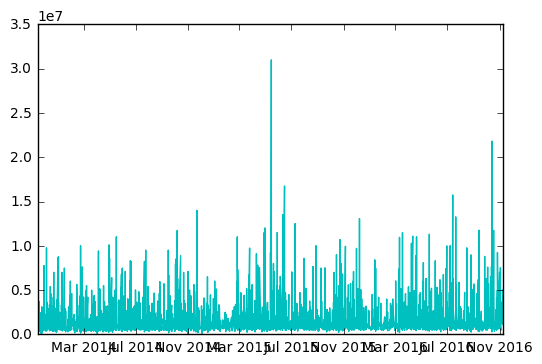

In [159]:
plt.plot(df_sold.sale_price)
plt.show()

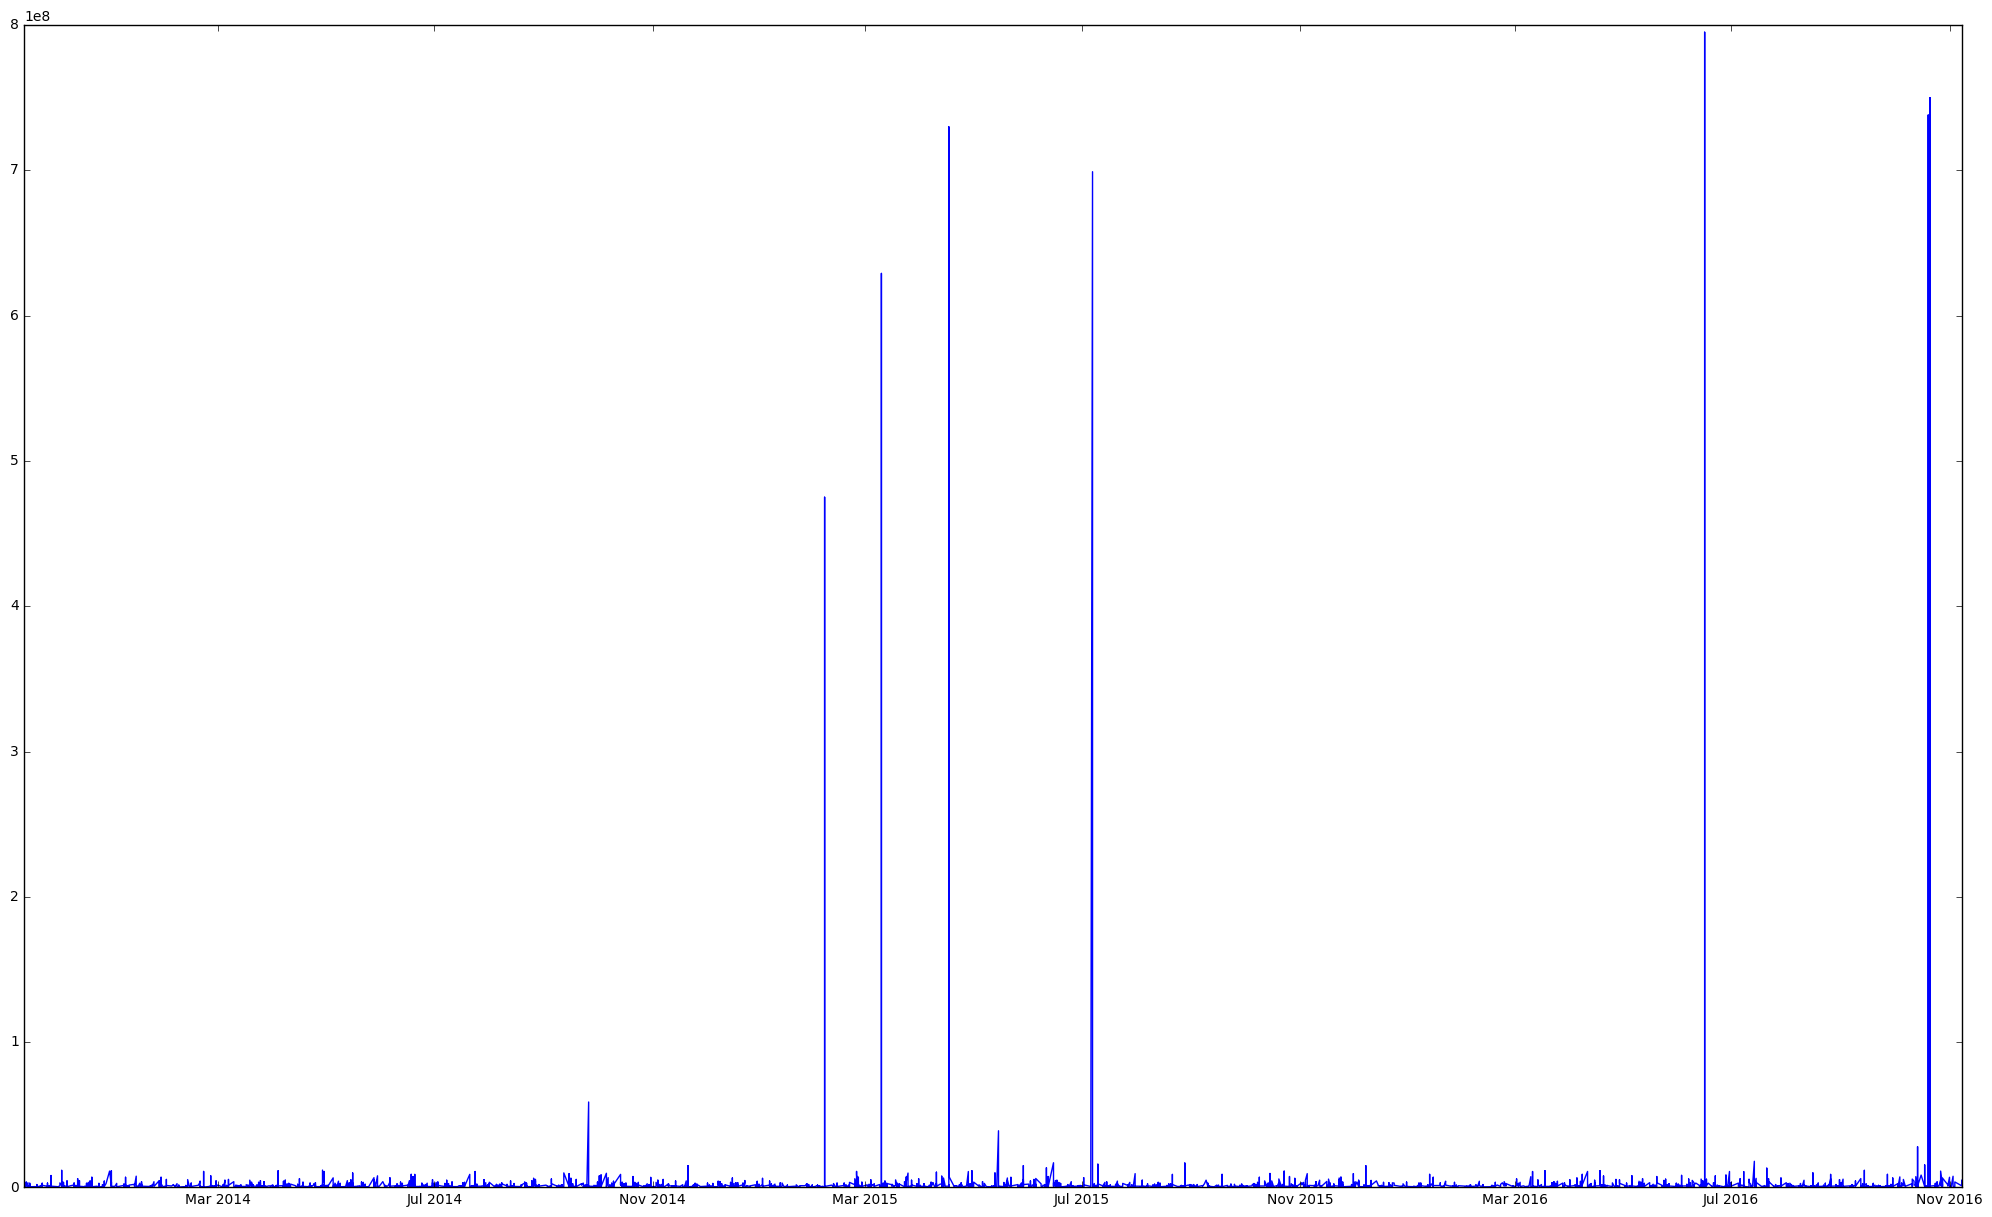

In [188]:
plt.figure(figsize=(25,15))
#plt.plot(df_sold.sale_price, color='red')
plt.plot(df_sold.list_price, color = 'blue')
ylim = [0, 1000]
plt.show()

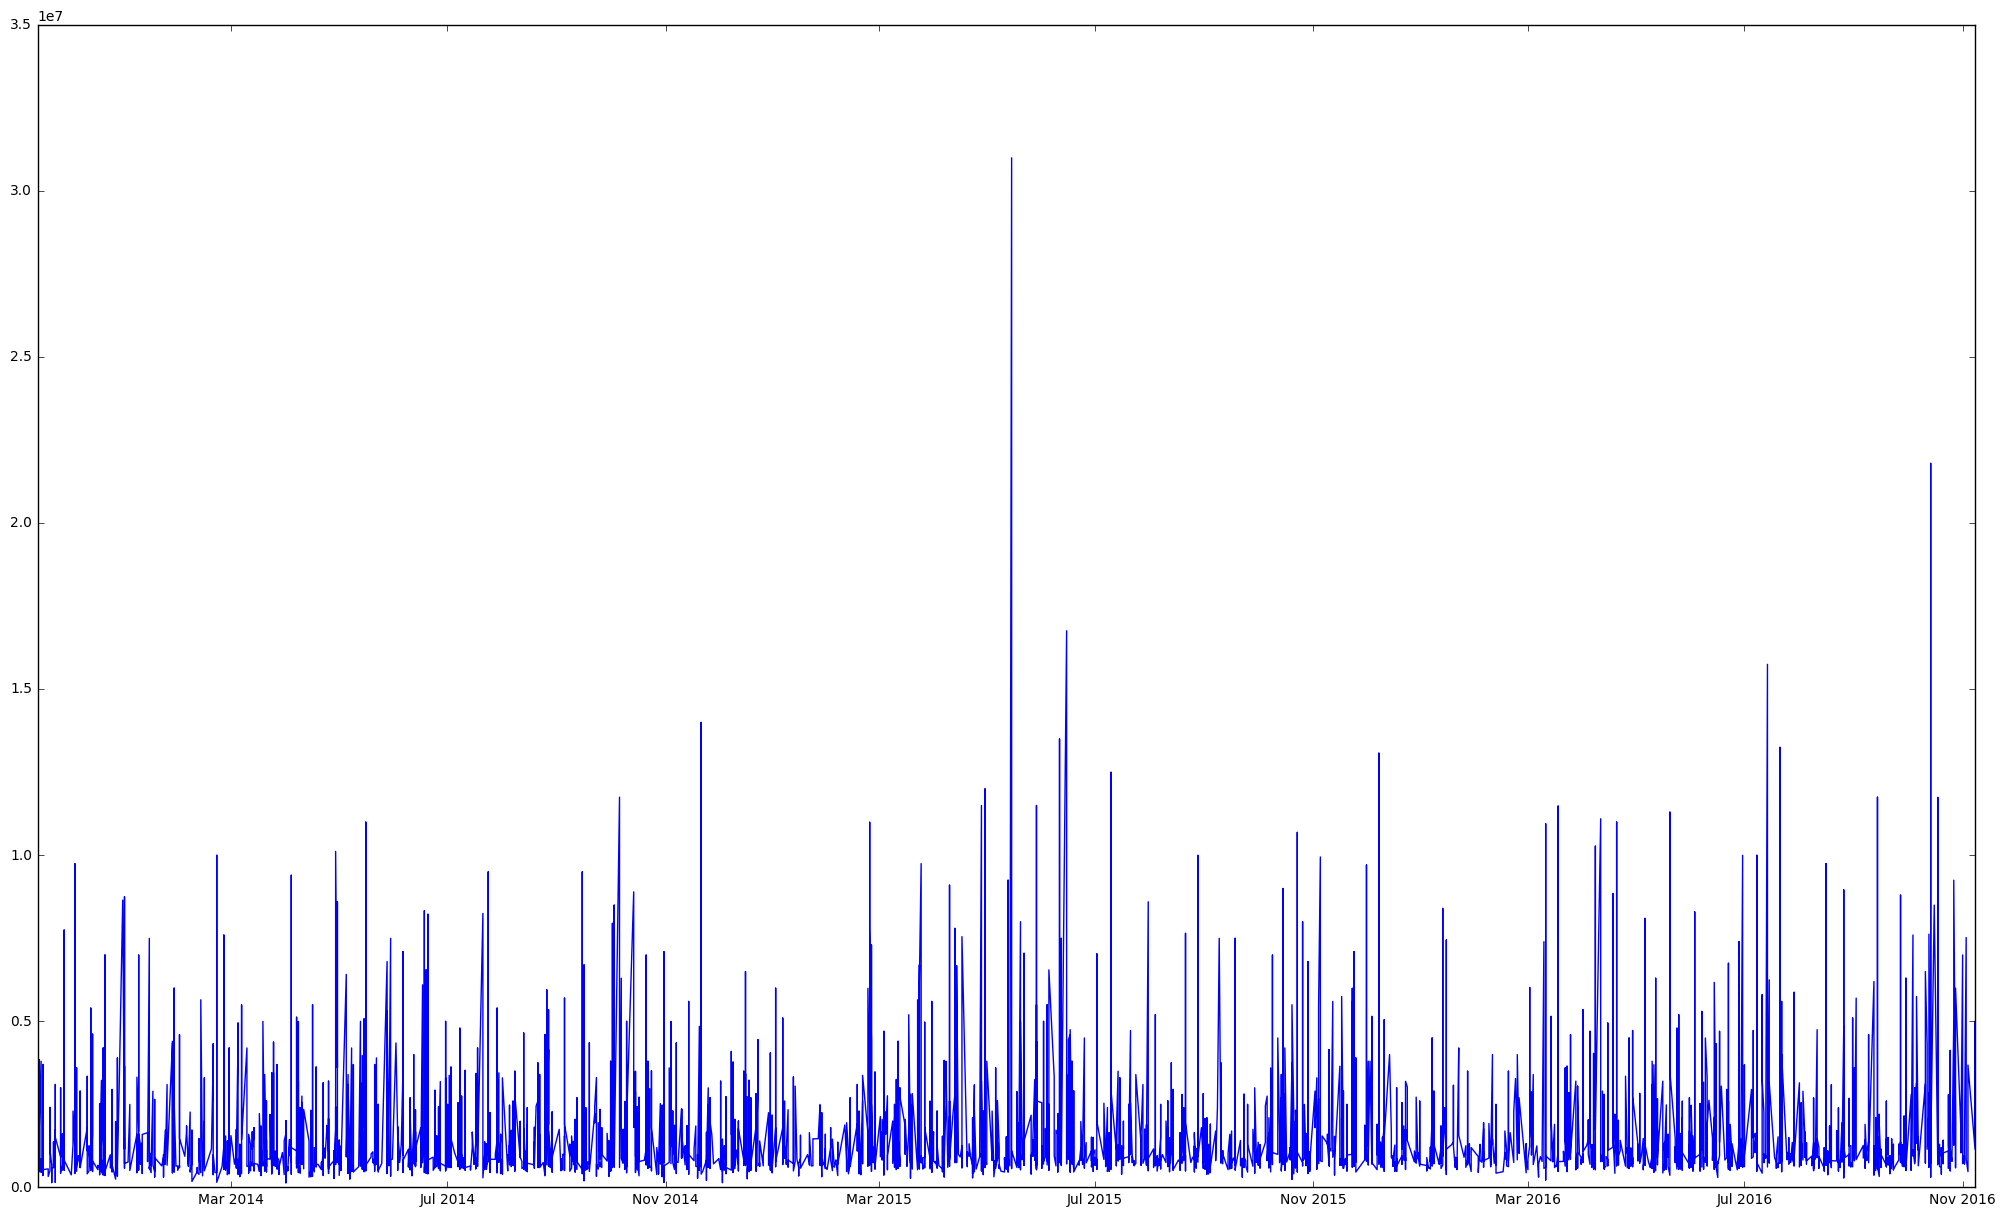

In [185]:
plt.figure(figsize=(25,15))
#plt.plot(df_sold[['list_price']])
plt.plot(df_sold[['sale_price']])
plt.show()

In [177]:
df_sold.list_price[df_sold.list_price > 5000000].count()


176

In [181]:
df_sold.sale_price[df_sold.sale_price > 5000000].count()

169

In [180]:
df_sold.head(1)

,address,district,bedroom,bath,parking,sqft,dollar_sqft,home_own_ass,day_on_market,list_price,sale_price,sale_to_list_ratio,single_f_h,condo,dist_no,sold_year,sold_month
sold,,,,,,,,,,,,,,,,,
2013-11-12,946 Stockton St #14A,Financial District/B,2,1.5,0,744,799.731183,556.0,8,500000,595000,119.0,0,1,8,2013,11


In [182]:
df_sold[['list_price', 'sale_price']]


,list_price,sale_price
sold,,
2013-11-12,500000,595000
2013-11-12,599000,610000
2013-11-12,1195000,1130000
2013-11-13,448000,510000
2013-11-13,559000,641500
2013-11-13,539000,550000
2013-11-13,479000,477000
2013-11-13,1299888,1245075
2013-11-13,1300000,1330000


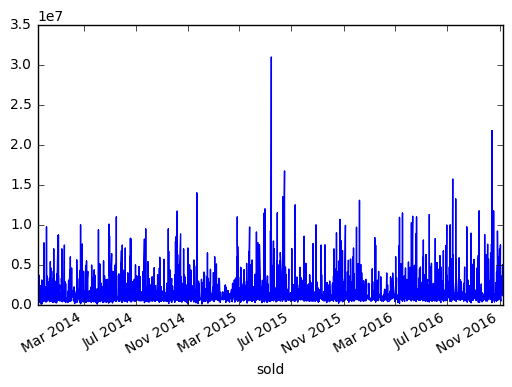

In [190]:
df_sold.sale_price.plot()
plt.show()

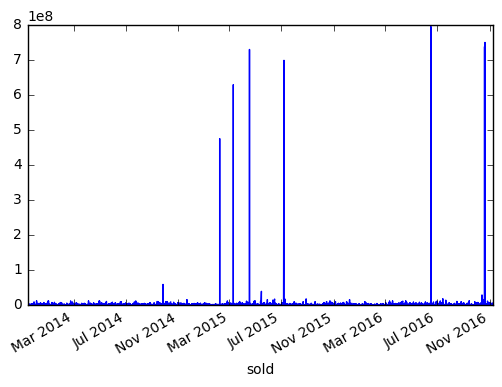

In [191]:
df_sold.list_price.plot()
plt.show()